# Statistical Data Analysis 2
## Project 2 - Gibbs Sampling
### Iwona Goździewska

In [1]:
from pomegranate import *

# The Rain Bayesian network
cloudy = DiscreteDistribution({'1': 0.50, '0': 0.50})
sprinkler = ConditionalProbabilityTable([['1', '1', 0.10], ['0', '1', 0.50],
                                         ['0', '0', 0.90], ['1', '0', 0.50]], [cloudy])
rain = ConditionalProbabilityTable([['1', '1', 0.80], ['0', '1', 0.20],
                                    ['0', '0', 0.80], ['1', '0', 0.20]], [cloudy])
wet_grass = ConditionalProbabilityTable(
    [['1', '1', '1', 0.99],
     ['1', '0', '1', 0.90],
     ['0', '1', '1', 0.90],
     ['0', '0', '1', 0.01],
     ['1', '1', '0', 0.01],
     ['1', '0', '0', 0.10],
     ['0', '1', '0', 0.10],
     ['0', '0', '0', 0.99]
     ], [sprinkler, rain]
)

s1 = Node(cloudy, name="Cloudy")
s2 = Node(sprinkler, name="Sprinkler")
s3 = Node(rain, name="Rain")
s4 = Node(wet_grass, name="Wet Grass")

model = BayesianNetwork("The Rain Network")
model.add_states(s1, s2, s3, s4)
model.add_edge(s1, s2)
model.add_edge(s1, s3)
model.add_edge(s2, s4)
model.add_edge(s3, s4)
model.bake()

### 1. Derive the formulas for P (C = T | R = T, S = T, W = T), P (C = T | R = F, S = T, W =T), P (R = T | C = T, S = T, W = T) and P (R = T | C = F, S = T, W = T) up to normalization constants in the denominators, and compute their values by renormalizing the two possible values for each conditional probability distribution. (1 point)

In [2]:
# P(C = T | R = T, S = T, W = T)
p1 = model.predict_proba({'Sprinkler': '1', 'Rain': '1', 'Wet Grass': '1'})
p1 = p1[0].parameters[0]
print(f"P(C = T | R = T, S = T, W = T) = {round(p1['1'], 3)}")
print(f"1 - P(C = T | R = T, S = T, W = T) = {round(p1['0'], 3)}")

P(C = T | R = T, S = T, W = T) = 0.444
1 - P(C = T | R = T, S = T, W = T) = 0.556


In [3]:
# P(C = T | R = F, S = T, W =T)
p2 = model.predict_proba({'Sprinkler': '1', 'Rain': '0', 'Wet Grass': '1'})
p2 = p2[0].parameters[0]
print(f"P(C = T | R = F, S = T, W =T) = {round(p2['1'], 3)}")
print(f"1 - P(C = T | R = F, S = T, W =T) = {round(p2['0'], 3)}")


P(C = T | R = F, S = T, W =T) = 0.048
1 - P(C = T | R = F, S = T, W =T) = 0.952


In [4]:
#  P(R = T | C = T, S = T, W = T)
p3 = model.predict_proba({'Cloudy': '1', 'Sprinkler': '1', 'Wet Grass': '1'})
p3 = p3[2].parameters[0]
print(f"P(R = T | C = T, S = T, W = T) = {round(p3['1'], 3)}")
print(f"1 - P(R = T | C = T, S = T, W = T) = {round(p3['0'], 3)}")

P(R = T | C = T, S = T, W = T) = 0.815
1 - P(R = T | C = T, S = T, W = T) = 0.185


In [5]:
#  P(R = T | C = F, S = T, W = T)
p4 = model.predict_proba({'Cloudy': '0', 'Sprinkler': '1', 'Wet Grass': '1'})
p4 = p4[2].parameters[0]
print(f"P(R = T | C = F, S = T, W = T) = {round(p4['1'], 3)}")
print(f"1 - P(R = T | C = F, S = T, W = T) = {round(p4['0'], 3)}")

P(R = T | C = F, S = T, W = T) = 0.216
1 - P(R = T | C = F, S = T, W = T) = 0.784


I checked all above marginal probabilities analytically and obtained the same values:  
$ P(C=T|R=T,S=T,W=T)=P(C=T|R=T,S=T) = \frac{P(C=T) \cdot P(R=T|C=T) \cdot P(S=T|C=T)}{P(C=T) \cdot P(R=T|C=T) \cdot P(S=T|C=T) + P(C=F) \cdot P(R=T|C=F)P(S=T|C=F)} = \frac{0.5 \cdot 0.6 \cdot 0.1}{0.5 \cdot 0.8 \cdot 0.1 + 0.5 \cdot 0.2 \cdot 0.5} = 0.44 $  
$ P(C=F|R=T,S=T,W=T) = 1 - P(C=T|R=T,S=T,W=T) = 0.566 $  

$P(C=T|R=F,S=T,W=T) = P(C=T|R=F,S=T) = \frac{P(C=T) \cdot P(R=F|C=T) \cdot P(S=T|C=T)}{P(C=T) \cdot P(R=F|C=T) \cdot P(S=T|C=T) + P(C=F) \cdot P(R=F|C=F) \cdot P(S=T|C=F)} = \frac{0.5 \cdot 0.2 \cdot 0.1}{0.5 \cdot 0.2 \cdot 0.1 + 0.5 \cdot 0.8 \cdot 0.5} = 0.048 $  
$ P(C=F|R=F,S=T,W=T) = 1 - P(C=T|R=F,S=T,W=T) = 0.952 $  

$ P(R=T|C=T,S=T,W=T) = \frac{P(R=T|C=T,S=T) \cdot P(W=T|R=T,C=T,S=T)}{P(W=T|C=T,S=T)} = \frac{P(R=T|C=T) \cdot P(W=T|R=T,S=T)}{P(R=T|C=T) \cdot P(W=T|R=T,S=T) + P(R=F|C=T) \cdot P(W=T|R=F,S=F)} = \frac{0.8 \dot 0.99}{0.8 \cdot 0.99 + 0.2 \cdot 0.9} = 0.815 $  
$ P(R=F|C=T,S=T,W=T) = 1 - P(R=T|C=T,S=T,W=T) = 0.185 $  

$ P(R=T|C=F,S=T,W=T) = \frac{P(R=T|C=F,S=T) \cdot P(W=T|R=T,C=F,S=T)}{P(W=T|C=F,S=T} = \frac{P(R=T|C=F) \cdot P(W=T|R=T,S=T)}{P(R=T|C=F) \cdot P(W=T|R=T,S=T) + P(R=F|C=F) \cdot P(W=T|R=F,S=T)} = \frac{0.2 \cdot 0.99}{0.2 \cdot 0.99 + 0.8 \cdot 0.9} = 0.216 $  
$ P(R=F|C=F,S=T,W=T) = 1 - P(R=T|C=F,S=T,W=T) = 0.784 $


### 2. Implement the Gibbs sampler sketched above for the Bayesian network in Figure 1 and draw 100 samples from the joint probability distribution P(R, C | S = T, W = T)

In [9]:
samples_100 = model.sample(n=100, evidences=[{'Sprinkler': '1', 'Wet Grass': '1'}], algorithm='gibbs')

### 3. Estimate the marginal probability of rain, given that the sprinkler is on and the grass is wet P (R = T | S = T, W = T) from the 100 samples. (1 point)

In [10]:
# Marginal probability depend of sampled data
model_100 = BayesianNetwork.from_samples(samples_100, algorithm='exact')

p5 = model_100.predict_proba({'Sprinkler': '1', 'Wet Grass': '1'})
p5 = p5[2].parameters[0]
print(f"Marginal probability P(R = T | S = T, W = T) estimated from the 100 samples: {round(p5['1'], 3)}")


Marginal probability P(R = T | S = T, W = T) estimated from the 100 samples: 0.35


### 4. Now draw 50,000 samples instead of 100 using the Gibbs sampler.

In [11]:
samples_50k_v1 = model.sample(n=50_000, evidences=[{'Sprinkler': '1', 'Wet Grass': '1'}], algorithm='gibbs')
samples_50k_v2 = model.sample(n=50_000, evidences=[{'Sprinkler': '1', 'Wet Grass': '1'}], algorithm='gibbs')


### 5. Provide the plot of the relative frequencies of R = T and C = T up to each iteration t against t, for two independent runs of the sampler. Suggest a burn-in time based on this plot. (1 point)

In [12]:
import pandas as pd
import matplotlib.pyplot as plt


def count_relative_frequency(samples, n):
    freqs_df = pd.DataFrame()
    counter_cloudy = 0 # s1
    counter_rain = 0 # s3

    freqs_cloudy = []
    freqs_rain = []

    for i in range(n):
        cloudy_state = samples[i][0]
        counter_cloudy += int(cloudy_state)
        freq_cloudy = counter_cloudy / (i + 1)
        freqs_cloudy.append(freq_cloudy)

        rain_state = samples[i][2]
        counter_rain += int(rain_state)
        freq_rain = counter_rain / (i + 1)
        freqs_rain.append(freq_rain)

    freqs_df['CloudyFreq'] = freqs_cloudy
    freqs_df['RainyFreq'] = freqs_rain
    return freqs_df

def plot_frequencies():
    freqs_v1 = count_relative_frequency(samples_50k_v1, 50_000)
    freqs_v2 = count_relative_frequency(samples_50k_v2, 50_000)

    n = [x for x in range(1, 50_001)]
    fig, axs = plt.subplots(2, 2, sharex=True, sharey=True)
    axs[0, 0].plot(n, freqs_v1['CloudyFreq'])
    axs[0, 0].set_title("Run1 Cloudy = T Frequency")
    axs[0,0].fill_between(n, freqs_v1['CloudyFreq'])

    axs[1, 0].plot(n, freqs_v1['RainyFreq'])
    axs[1, 0].set_title("Run1 Rainy = T Frequency")
    axs[1,0].fill_between(n, freqs_v1['RainyFreq'])

    axs[0, 1].plot(n, freqs_v2['CloudyFreq'])
    axs[0, 1].set_title("Run2 Cloudy = T Frequency")
    axs[0,1].fill_between(n, freqs_v2['CloudyFreq'])

    axs[1, 1].plot(n, freqs_v2['RainyFreq'])
    axs[1, 1].set_title("Run2 Rainy = T Frequency")
    axs[1,1].fill_between(n, freqs_v2['RainyFreq'])

    for ax in axs.flat:
        ax.set(xlabel='Interation t', ylabel='Frequency')

    fig.tight_layout()
    fig.savefig('./frequencies_plot.jpg')
    fig.show()

<ipython-input-12-46f301e5fcf4>:55: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


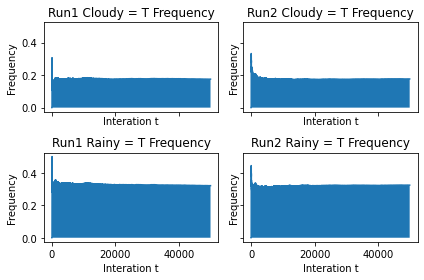

In [13]:
plot_frequencies()

It looks like frequency of samples rainy and cloudy stabilize around 8 000 iterations, so I suggest burn-in about 8 000 iterations.

### 6. Apply the Gelman test and plot potential scale reduction factor changes over the iterations using gelman.plot() from the coda package. Roughly speaking, this factor measures the ratio of the variances within and between independent runs of the sampler. Thus, for a stationary distribution, this factor should be close to 1.0. Suggest a burn-in time based on this plot. (2 points)

In [14]:
def sample_data_to_dict(samples_50k_v1, samples_50k_v2):
    sampled_data = {}
    lc = []
    lr = []

    cloudy_samples_v1 = []
    cloudy_samples_v2 = []
    rainy_samples_v1 = []
    rainy_samples_v2 = []

    for i, j in zip(samples_50k_v1, samples_50k_v2):
        cloudy_samples_v1.append(i[0])
        cloudy_samples_v2.append(j[0])
        rainy_samples_v1.append(i[2])
        rainy_samples_v2.append(j[2])

    cloudy_samples_v1 = list(map(int, cloudy_samples_v1))
    cloudy_samples_v2 = list(map(int, cloudy_samples_v2))
    rainy_samples_v1 = list(map(int, rainy_samples_v1))
    rainy_samples_v2 = list(map(int, rainy_samples_v2))

    lc.append(cloudy_samples_v1)
    lc.append(cloudy_samples_v2)
    lr.append(rainy_samples_v1)
    lr.append(rainy_samples_v2)
    
    sampled_data['cloudy'] = lc
    sampled_data['rainy'] = lr
    
    return sampled_data
    
    

In [15]:
sampled_data = sample_data_to_dict(samples_50k_v1, samples_50k_v2)

In [16]:
import arviz as az
from statistics import median


def gelman_plot(sampled_data):    
    bin_size = 50
    list_size = 50_000
    
    variable_names = ['cloudy', 'rainy']
    gelman_data = {}
    for variable in variable_names:
        l = []
        shrink_factors= []
        median_sf = []
        x = []
        sampled_bin = {}
        for i in range(1, int(list_size/bin_size) + 1):
            bin_0 = sampled_data[variable][0][0:i*bin_size] # run 1
            bin_1 = sampled_data[variable][1][0:i*bin_size] # run 2
            x.append(i*bin_size)
            sampled_bin[variable] = [bin_0, bin_1]
            sampled_bin_az = az.convert_to_dataset({variable: sampled_bin})
            shrink_factors.append(float(az.rhat(sampled_bin)[variable]))
            median_sf.append(median(shrink_factors))
        l.append(shrink_factors)
        l.append(median_sf)
        gelman_data[variable] = l
        
    for variable in variable_names:
        plt.plot(x, gelman_data[variable][0], linewidth=2, alpha=0.5, label="exact")
        plt.plot(x, gelman_data[variable][1], 'm-', linewidth=1, label="median")
        plt.plot(x, [1 for i in range(len(x))], 'k', linewidth=1)
        plt.ylabel('Shrink factor')
        plt.xlabel('Sample')
        plt.title(f'Shrink factor over samples number for variable {variable}')
        plt.legend()
        plt.savefig(f'./shrink_factor_{variable}.jpg')
        plt.show()


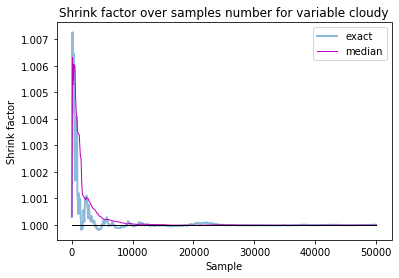

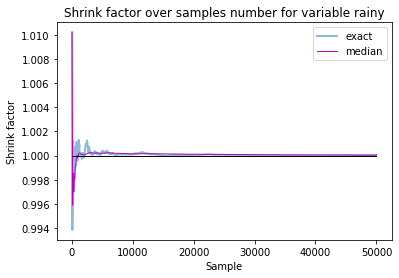

In [17]:
gelman_plot(sampled_data)

According to Gelman test, the burn-in time should be about 8 000 samples. 

### 7. Investigate the auto-correlation among the samples. We expect adjacent members from a Gibbs sampling sequence to be positively correlated, and we can quantify the amount of this correlation by using the auto-correlation function. The lag-k auto-correlation ρ k is the correlation between every draw and its kth neighbouring samples. Use the R-function acf() to provide plots for both variables Rain and Cloudy. Suggest an interval for drawing approximately independent samples. (2 points)

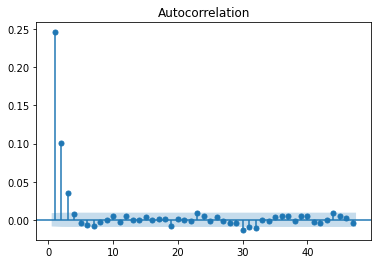

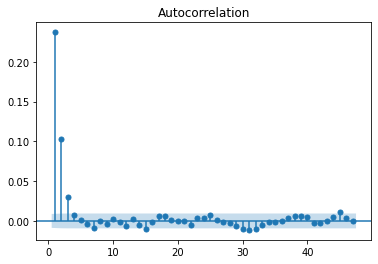

In [21]:
from statsmodels.graphics import tsaplots

sampled_data_cloudy_np = numpy.array(sampled_data['cloudy'][0])
acf_cloudy = tsaplots.plot_acf(sampled_data_cloudy_np, zero=False)
acf_cloudy.savefig(f'./autocorr_cloudy.jpg')

sampled_data_rainy_np = numpy.array(sampled_data['rainy'][0])
acf_rainy = tsaplots.plot_acf(sampled_data_rainy_np, zero=False)
acf_rainy.savefig(f'./autocorr_rainy.jpg')


plt.show()

I suggest the interval should be equal to 5, the 5th sample is in the confidence interval.

### 8. Re-estimate P (R = T | S = T, W = T) based on 100 samples obtained after the suggested burn-in time and thinning-out. Compare with (3) and comment on your results. (1 point)

In [57]:
resampled = model.sample(n=505, evidences=[{'Sprinkler': '1', 'Wet Grass': '1'}], algorithm='gibbs', 
                             burnin=8_000, random_state=0) # setting a seed
resampled_100 = resampled[5::5] # thinning-out to every 5th one
remodel_100 = BayesianNetwork.from_samples(resampled_100, algorithm='exact')

p6 = remodel_100.predict_proba({'Sprinkler': '1', 'Wet Grass': '1'})
p6 = p6[2].parameters[0]
print(f"Re-estimated marginal probability P(R=T|S=T,W=T) estimated from the 100 samples, discarding first 8 000 and with thining out to every 5th sample is equal to {round(p6['1'], 3)}, whereas without discarding and thinning-out is equal to {round(p5['1'], 3)}")


Re-estimated marginal probability P(R=T|S=T,W=T) estimated from the 100 samples, discarding first 8 000 and with thining out to every 5th sample is equal to 0.32, whereas without discarding and thinning-out is equal to 0.35


Marginal probabaility estimated for 100 samples without discarding samples before burn-in and without thinning-out, highly depends on generated samples and can vary by about 0.15. Introduction of burn-in and thining-out samples makes a difference, generated samples are more reproductible so the result of marginal probability is more reproducible. When I setted the seed, the result became stable and equal to 0.32.

### 9. Compute the probability P (R = T | S = T, W = T) analytically and compare it to the sampling estimate. In real world applications, sampling is performed, because it is usually not possible to easily compute the probabilities analytically. However, since the Bayesian network in Figure 1 is only a small network with discrete variables, the analytical approach is possible. (2 points)

$ P (R = T, S = T, W = T) = P(R=T|C=T) \cdot P(S=T|C=T) \cdot P(W=T|S=T,R=T) + P(R=T|C=F) \cdot P(S=T|C=F) \cdot P(W=T|S=T, R=T) = 0.8 \cdot 0.1 \cdot 0.99 + 0.2 \cdot 0.5 \cdot 0.99 = 0.1782 $  

$ P(S=T,W=T) = P(R=T,S=T,W=T) + P(R=F,S=T,W=T) $  

$ P(R=F, S=T, W=T) = P(R=F|C=T) \cdot P(S=T|C=T) \dot P(W=T|S=T,R=T) + P(R=F|C=T) \cdot P(S=T|C=F) \cdot P(W=T|S=T,R+F) = 0.8 \cdot 0.1 \cdot 0.99 + 0.8 \cdot 0.5 \cdot 0.99 = 0.378 $  

$ P(R=T|S=T,W=T) = \frac{0.1782}{0.1782 + 0.378} = 0.32 $

Summing up, when to use Gibbs sampler it is crucial to assess burn-in, assess interval to draw approximately independent samples and set the seed. This gives very accurate result, in this case marginal probability P(R=T|S=T,W=T) obtained computationally and calculated analytically are both equal to 0.32.